In [1]:
using Pkg; Pkg.activate("ALSims.jl")

 Activating environment at `~/notebooks/active_learning/alsim/ALSims.jl/Project.toml`


In [2]:
using ProgressMeter

In [3]:
using ALSims
using PyPlot; const plt = PyPlot
using Statistics

In [32]:
snr = 10

n_pt = 500
n_bm = 0
n_tx = 5
n_int = 5
# int_ind = [(i, i) for i in 1:n_int]
n_int = 0
int_ind = Vector{NTuple{2, Int}}()
n_x = 1 + n_bm + n_tx + n_int

X_bm = rand([0, 1], n_pt, n_bm)
X_tx = rand([0, 1], n_pt, n_tx);

In [33]:
true_model = GaussianGenerativeModel(snr * randn(n_x), 1.0)
learning_model = GaussianLearningModel(n_x)

GaussianLearningModel with 6 features


In [45]:
policies = Dict(:ptw => ALSims.ptw_policy, :ts => ALSims.ts_policy, :ucb => ALSims.ucb_policy, :ura => ALSims.ura_policy)

Dict{Symbol,Function} with 4 entries:
  :ptw => ptw_policy
  :ura => ura_policy
  :ts  => ts_policy
  :ucb => ucb_policy

In [46]:
sim_data = simulate_patients(X_bm, n_tx, true_model, learning_model; bm_tx_int_ind = int_ind, policies = policies)

Dict{Any,Any} with 6 entries:
  :ptw           => Dict{Symbol,Any}(:policy=>ptw_policy,:models=>GaussianLearn…
  :ura           => Dict{Symbol,Any}(:policy=>ura_policy,:models=>GaussianLearn…
  :true_model    => GaussianGenerativeModel{Float64}([-12.4048, -2.03338, -14.8…
  :ts            => Dict{Symbol,Any}(:policy=>ts_policy,:models=>GaussianLearni…
  :initial_model => GaussianLearningModel with 6 features…
  :ucb           => Dict{Symbol,Any}(:policy=>ucb_policy,:models=>GaussianLearn…

In [47]:
sim_function(true_model) = simulate_patients(X_bm, n_tx, true_model, learning_model; bm_tx_int_ind = int_ind, policies)

n_iter = 100
true_models = [GaussianGenerativeModel(snr * randn(n_x), 1.0) for i in 1:n_iter]

sim_data_array = @showprogress map(sim_function, true_models);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:15


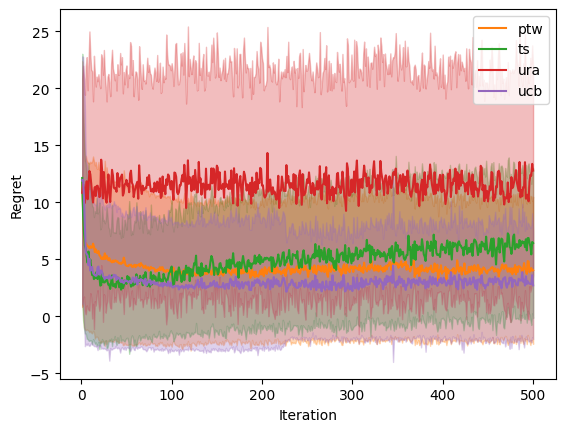

PyObject <matplotlib.legend.Legend object at 0x7f05faad9280>

In [49]:

for (i, key) in enumerate([:ptw, :ts, :ura, :ucb])
    y = hcat([sim_data_array[i][key][:regrets] for i in 1:n_iter]...)
    # y = cumsum(y, dims=1)
    y_mean = reshape(mean(y, dims=2), n_pt)
    y_std = reshape(std(y, dims=2), n_pt)
    x = collect(1:n_pt)
    c = "C$i"
    plt.plot(x, y_mean, color=c, label=String(key))
    plt.fill_between(x, y_mean .- y_std, y_mean .+ y_std, alpha=0.3, color=c)
    plt.ylabel("Regret")
    plt.xlabel("Iteration")
end
plt.legend()